# Convolutional Neural Networks in tf

In [1]:
# https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#### Data

In [77]:
base_dir = 'data'

train_cats_dir = os.path.join(base_dir, 'train\\cats')
train_dogs_dir = os.path.join(base_dir, 'train\\dogs')

validation_cats_dir = os.path.join(base_dir, 'validation\\cats')
validation_dogs_dir = os.path.join(base_dir, 'validation\\dogs')

In [83]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
validation_cat_fnames = os.listdir(validation_cats_dir)
validation_dog_fnames = os.listdir(validation_dogs_dir)
train_dog_fnames[:5]

['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg']

In [82]:
print(len(train_cat_fnames))
print(len(train_dog_fnames))
print(len(validation_cat_fnames))
print(len(validation_dog_fnames))

1000
1000
500
500


In [21]:
img_path

'data\\train\\cats\\cat.0.jpg'

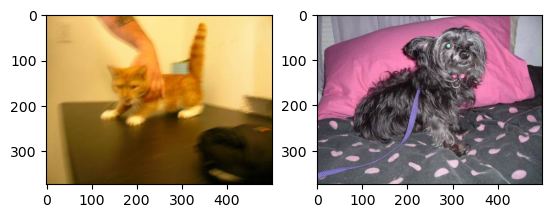

In [26]:
img_path=os.path.join(train_cats_dir, train_cat_fnames[0])
img1 = mpimg.imread(img_path)
img_path=os.path.join(train_dogs_dir, train_dog_fnames[0])
img2 = mpimg.imread(img_path)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img1)
axarr[1].imshow(img2)

In [40]:
datagen=ImageDataGenerator(rescale=1/255)
train_generator=datagen.flow_from_directory('data/validation',batch_size=20,class_mode='binary',target_size=(150,150))
validation_generator=datagen.flow_from_directory('data/validation',batch_size=20,class_mode='binary',target_size=(150,150))

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### Model

In [45]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [46]:
model.compile(optimizer=RMSprop(0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
history=model.fit(train_generator,epochs=15,validation_data=validation_generator,verbose=2)

Epoch 1/15
50/50 - 23s - loss: 0.2520 - accuracy: 0.9710 - val_loss: 0.0090 - val_accuracy: 1.0000 - 23s/epoch - 457ms/step
Epoch 2/15
50/50 - 21s - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000 - 21s/epoch - 415ms/step
Epoch 3/15
50/50 - 25s - loss: 0.0863 - accuracy: 0.9870 - val_loss: 0.0064 - val_accuracy: 1.0000 - 25s/epoch - 497ms/step
Epoch 4/15
50/50 - 21s - loss: 0.0951 - accuracy: 0.9840 - val_loss: 0.0058 - val_accuracy: 1.0000 - 21s/epoch - 423ms/step
Epoch 5/15
50/50 - 27s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 3.1727e-04 - val_accuracy: 1.0000 - 27s/epoch - 547ms/step
Epoch 6/15
50/50 - 19s - loss: 0.0744 - accuracy: 0.9830 - val_loss: 0.0085 - val_accuracy: 1.0000 - 19s/epoch - 385ms/step
Epoch 7/15
50/50 - 17s - loss: 0.0374 - accuracy: 0.9900 - val_loss: 0.0177 - val_accuracy: 0.9930 - 17s/epoch - 336ms/step
Epoch 8/15
50/50 - 16s - loss: 0.0216 - accuracy: 0.9920 - val_loss: 0.0013 - val_accuracy: 1.0000 - 16s/epoch - 323ms/step
Epoc

[[0.8866619]] cat


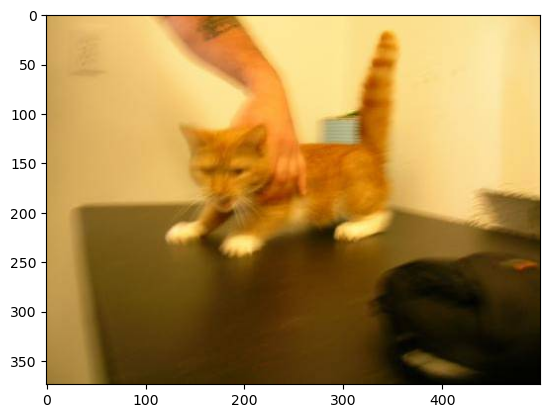

In [68]:
img_path=os.path.join(train_cats_dir, train_cat_fnames[0])
img=load_img(img_path,target_size=(150,150))
img1 = mpimg.imread(img_path)
plt.imshow(img1)
x=img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
pred=model.predict(x)
if pred <0.5:
    print(f'{pred} dog')
else:
    print(f'{pred} cat')

[[0.0161328]] dog


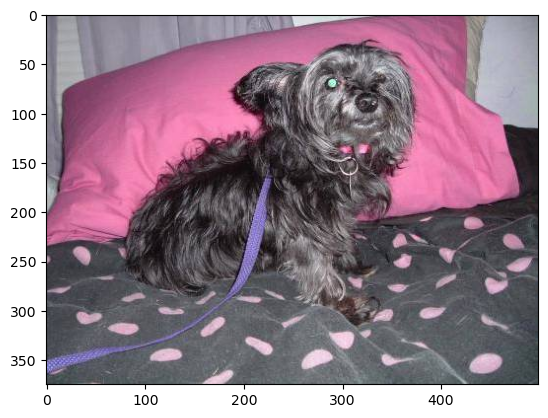

In [69]:
img_path=os.path.join(train_dogs_dir, train_dog_fnames[0])
img=load_img(img_path,target_size=(150,150))
img1 = mpimg.imread(img_path)
plt.imshow(img1)

x=img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
pred=model.predict(x)
if pred <0.5:
    print(f'{pred} dog')
else:
    print(f'{pred} cat')

#### Intermediate remresentations

C:\Users\pk764\AppData\Local\Temp\ipykernel_6872\3830027034.py:48: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()
C:\Users\pk764\AppData\Local\Temp\ipykernel_6872\3830027034.py:51: RuntimeWarning: invalid value encountered in cast
  x  = np.clip(x, 0, 255).astype('uint8')


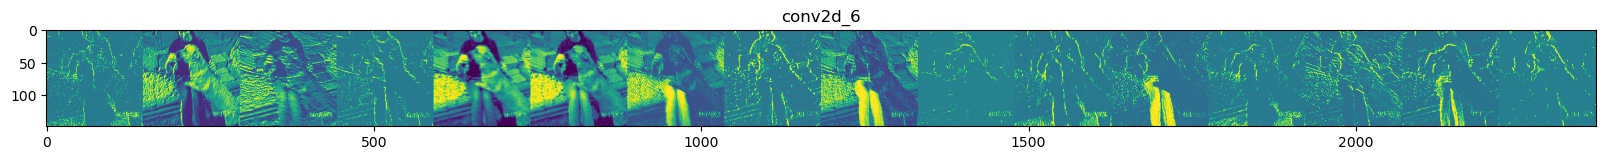

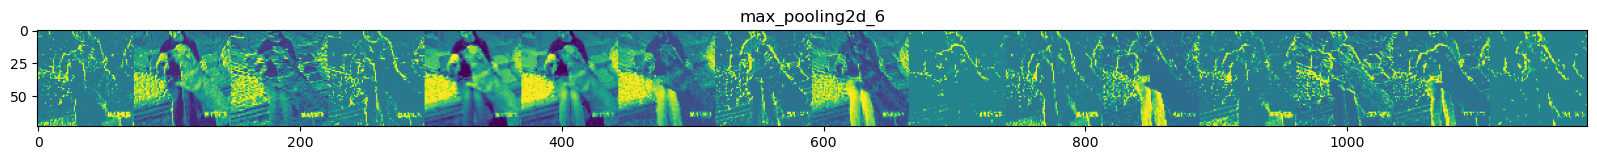

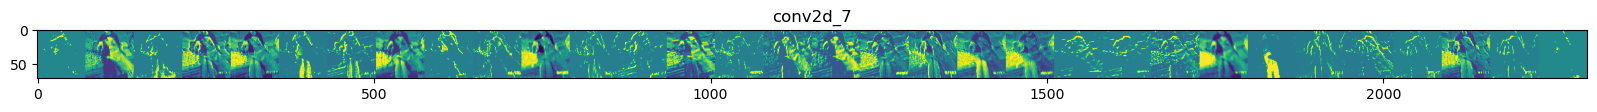

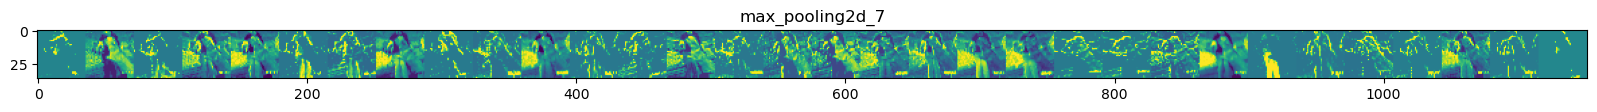

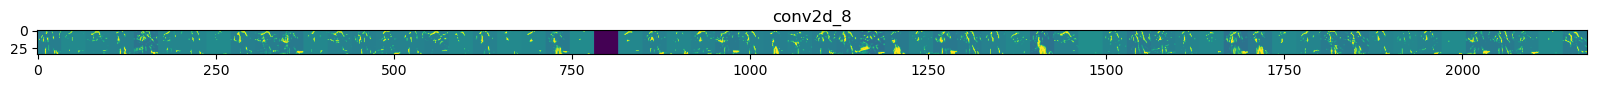

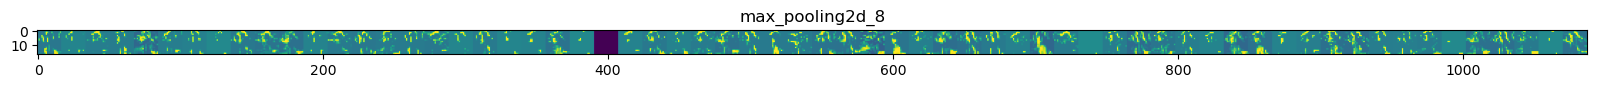

In [70]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

#### Evaluation

Text(0.5, 1.0, 'Training and validation loss')

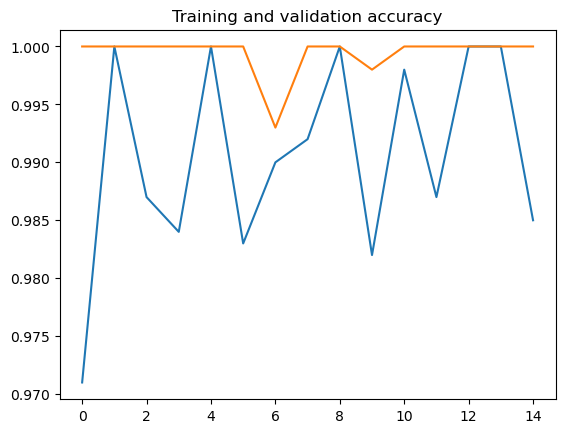

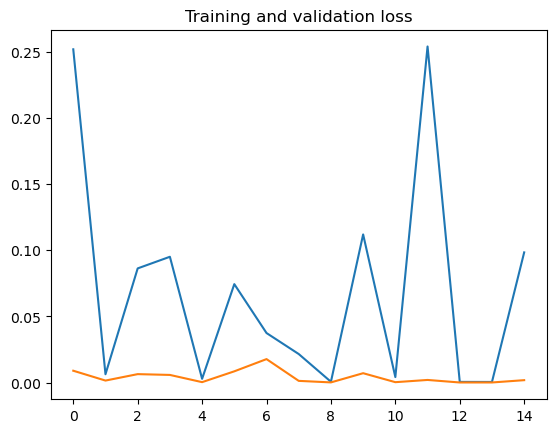

In [75]:
acc=history.history['accuracy']
loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title ('Training and validation loss')

---

## Image Augumentation

Changing images by rotating them so that moedl gets more different kinds of object photo.

Bare in mind that augumentation adds a `random fluctuation` to the training data, but if the test data doesn't have such fluctuations (`small test dataset`) then we might end up having `worse performance`.

#### Data

In [3]:
base_dir = 'data'

train_cats_dir = os.path.join(base_dir, 'train\\cats')
train_dogs_dir = os.path.join(base_dir, 'train\\dogs')

validation_cats_dir = os.path.join(base_dir, 'validation\\cats')
validation_dogs_dir = os.path.join(base_dir, 'validation\\dogs')

In [4]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
validation_cat_fnames = os.listdir(validation_cats_dir)
validation_dog_fnames = os.listdir(validation_dogs_dir)

##### baseline

In [5]:
datagen=ImageDataGenerator(rescale=1/255)
train_generator=datagen.flow_from_directory('data/train',batch_size=20,class_mode='binary',target_size=(150,150))
validation_generator=datagen.flow_from_directory('data/validation',batch_size=20,class_mode='binary',target_size=(150,150))

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [8]:
model.compile(optimizer=RMSprop(0.001),loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_generator,epochs=15,validation_data=validation_generator,verbose=2)

Epoch 1/15
50/50 - 15s - loss: 0.9900 - accuracy: 0.5390 - val_loss: 0.6677 - val_accuracy: 0.6000 - 15s/epoch - 309ms/step
Epoch 2/15
50/50 - 15s - loss: 0.6659 - accuracy: 0.6070 - val_loss: 0.5726 - val_accuracy: 0.7190 - 15s/epoch - 300ms/step
Epoch 3/15
50/50 - 16s - loss: 0.5880 - accuracy: 0.6790 - val_loss: 0.4827 - val_accuracy: 0.7500 - 16s/epoch - 312ms/step
Epoch 4/15
50/50 - 16s - loss: 0.4938 - accuracy: 0.7450 - val_loss: 0.3435 - val_accuracy: 0.8680 - 16s/epoch - 315ms/step
Epoch 5/15
50/50 - 19s - loss: 0.3894 - accuracy: 0.8250 - val_loss: 0.2375 - val_accuracy: 0.9100 - 19s/epoch - 375ms/step
Epoch 6/15
50/50 - 19s - loss: 0.2973 - accuracy: 0.8660 - val_loss: 0.1722 - val_accuracy: 0.9480 - 19s/epoch - 383ms/step
Epoch 7/15
50/50 - 17s - loss: 0.1865 - accuracy: 0.9310 - val_loss: 0.0944 - val_accuracy: 0.9650 - 17s/epoch - 349ms/step
Epoch 8/15
50/50 - 19s - loss: 0.1475 - accuracy: 0.9490 - val_loss: 0.0399 - val_accuracy: 0.9910 - 19s/epoch - 382ms/step
Epoch 9/

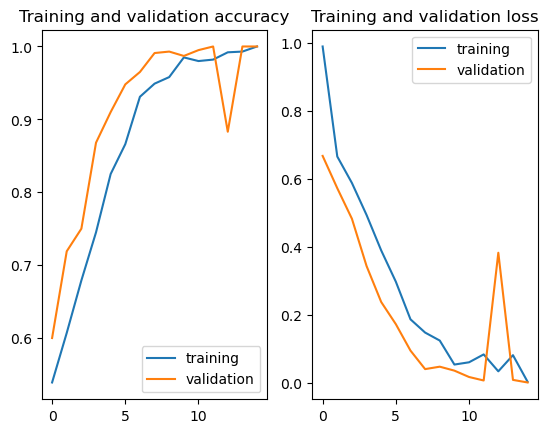

In [14]:
acc=history.history['accuracy']
loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

f, axarr = plt.subplots(1,2)
axarr[0].plot(epochs,acc,label='training')
axarr[0].plot(epochs,val_acc,label='validation')
axarr[0].set_title('Training and validation accuracy')
axarr[0].legend()
axarr[1].plot(epochs,loss,label='training')
axarr[1].plot(epochs,val_loss,label='validation')
axarr[1].set_title('Training and validation loss')
axarr[1].legend()

##### augumentation

In [6]:
datagen_aug=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_generator_aug=datagen_aug.flow_from_directory('data/train',batch_size=20,class_mode='binary',target_size=(150,150))

Found 1000 images belonging to 2 classes.


In [15]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [16]:
# should be 100 epoch and 0.0001 learning rate
model.compile(optimizer=RMSprop(0.001),loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_generator_aug,epochs=15,validation_data=validation_generator,verbose=2)

Epoch 1/15
50/50 - 17s - loss: 0.9939 - accuracy: 0.5090 - val_loss: 0.7123 - val_accuracy: 0.5000 - 17s/epoch - 337ms/step
Epoch 2/15
50/50 - 19s - loss: 0.7172 - accuracy: 0.5620 - val_loss: 0.6702 - val_accuracy: 0.5780 - 19s/epoch - 379ms/step
Epoch 3/15
50/50 - 22s - loss: 0.6994 - accuracy: 0.5520 - val_loss: 0.6637 - val_accuracy: 0.6430 - 22s/epoch - 437ms/step
Epoch 4/15
50/50 - 21s - loss: 0.7014 - accuracy: 0.5870 - val_loss: 0.6444 - val_accuracy: 0.5890 - 21s/epoch - 414ms/step
Epoch 5/15
50/50 - 21s - loss: 0.6907 - accuracy: 0.5950 - val_loss: 0.6620 - val_accuracy: 0.5710 - 21s/epoch - 423ms/step
Epoch 6/15
50/50 - 19s - loss: 0.6776 - accuracy: 0.5950 - val_loss: 0.6288 - val_accuracy: 0.6440 - 19s/epoch - 388ms/step
Epoch 7/15
50/50 - 18s - loss: 0.6718 - accuracy: 0.6130 - val_loss: 0.7157 - val_accuracy: 0.5990 - 18s/epoch - 361ms/step
Epoch 8/15
50/50 - 18s - loss: 0.6955 - accuracy: 0.6300 - val_loss: 0.5911 - val_accuracy: 0.6630 - 18s/epoch - 367ms/step
Epoch 9/

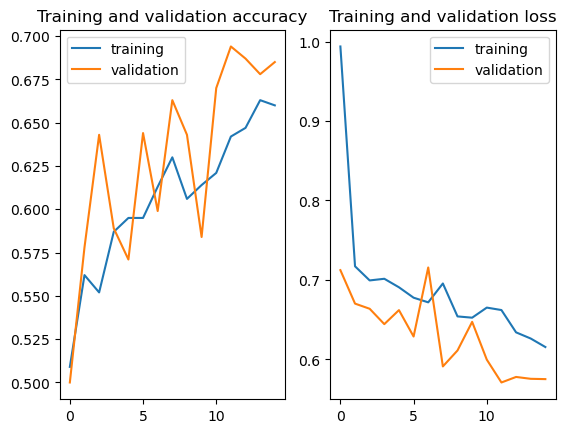

In [17]:
acc=history.history['accuracy']
loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

f, axarr = plt.subplots(1,2)
axarr[0].plot(epochs,acc,label='training')
axarr[0].plot(epochs,val_acc,label='validation')
axarr[0].set_title('Training and validation accuracy')
axarr[0].legend()
axarr[1].plot(epochs,loss,label='training')
axarr[1].plot(epochs,val_loss,label='validation')
axarr[1].set_title('Training and validation loss')
axarr[1].legend()

---

# Transfer Learning

`Dropout` - removes random number of neurons. Helps to avoid overfitting as neighbour neurons tend to have similiar weights and sometimes over specialize result.

In [1]:
# https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [21]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model
import os

#### Load pretrainsed model

In [5]:
local_weights_file = 'data/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model=InceptionV3(input_shape=(150,150,3),include_top=False,weights=None)
pre_trained_model.load_weights(local_weights_file)

In [13]:
for layer in pre_trained_model.layers:
    layer.trainable=False

In [8]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                       

In [9]:
last_layer=pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output=last_layer.output

last layer output shape:  (None, 7, 7, 768)


#### Add own layers

In [12]:
x=layers.Flatten()(last_output)
x=layers.Dense(1024, activation='relu')(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(1,activation='sigmoid')(x)

model=Model(pre_trained_model.input,x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                              

In [14]:
model.compile(optimizer=RMSprop(0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
#### Data

In [18]:
base_dir = 'data'

train_cats_dir = os.path.join(base_dir, 'train\\cats')
train_dogs_dir = os.path.join(base_dir, 'train\\dogs')

validation_cats_dir = os.path.join(base_dir, 'validation\\cats')
validation_dogs_dir = os.path.join(base_dir, 'validation\\dogs')

In [19]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
validation_cat_fnames = os.listdir(validation_cats_dir)
validation_dog_fnames = os.listdir(validation_dogs_dir)

In [24]:
datagen=ImageDataGenerator(rescale=1/255)
datagen_aug=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_generator=datagen_aug.flow_from_directory('data/train',batch_size=20,class_mode='binary',target_size=(150,150))
validation_generator=datagen.flow_from_directory('data/validation',batch_size=20,class_mode='binary',target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=100,epochs=20,validation_steps=50,verbose=2)

In [ ]:
acc=history.history['accuracy']
loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

f, axarr = plt.subplots(1,2)
axarr[0].plot(epochs,acc,label='training')
axarr[0].plot(epochs,val_acc,label='validation')
axarr[0].set_title('Training and validation accuracy')
axarr[0].legend()
axarr[1].plot(epochs,loss,label='training')
axarr[1].plot(epochs,val_loss,label='validation')
axarr[1].set_title('Training and validation loss')
axarr[1].legend()

---

# Multiclass Classification

In [1]:
#https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
#https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
#https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-validation.zip

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [15]:
datagen=ImageDataGenerator(rescale=1/255)
datagen_aug=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_generator=datagen_aug.flow_from_directory('data/rps',batch_size=126,class_mode='categorical',target_size=(150,150))
validation_generator=datagen.flow_from_directory('data/rps-test-set',batch_size=126,class_mode='categorical',target_size=(150,150))

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [16]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [17]:
model.compile(optimizer=RMSprop(0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_generator,epochs=20,steps_per_epoch=20,validation_data=validation_generator,verbose=1,validation_steps=3)

Epoch 1/20
20/20 [==============================] - 45s 2s/step - loss: 1.7334 - accuracy: 0.3948 - val_loss: 1.0164 - val_accuracy: 0.4247
Epoch 2/20
20/20 [==============================] - 34s 2s/step - loss: 0.9170 - accuracy: 0.5456 - val_loss: 0.6175 - val_accuracy: 0.8737
Epoch 3/20
20/20 [==============================] - 34s 2s/step - loss: 0.7501 - accuracy: 0.6528 - val_loss: 0.6741 - val_accuracy: 0.7527
Epoch 4/20
20/20 [==============================] - 34s 2s/step - loss: 0.7212 - accuracy: 0.6865 - val_loss: 0.4863 - val_accuracy: 0.7742
Epoch 5/20
20/20 [==============================] - 34s 2s/step - loss: 0.6141 - accuracy: 0.7345 - val_loss: 0.3542 - val_accuracy: 0.9624
Epoch 6/20
20/20 [==============================] - 35s 2s/step - loss: 0.5833 - accuracy: 0.7595 - val_loss: 0.4463 - val_accuracy: 0.8333
Epoch 7/20
20/20 [==============================] - 36s 2s/step - loss: 0.4649 - accuracy: 0.8214 - val_loss: 0.2225 - val_accuracy: 0.9462
Epoch 8/20
20/20 [==

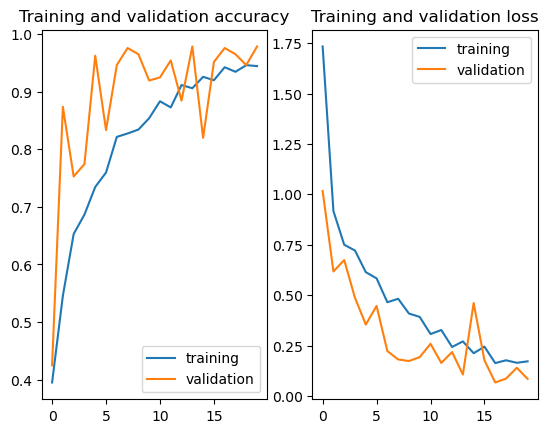

In [20]:
acc=history.history['accuracy']
loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

f, axarr = plt.subplots(1,2)
axarr[0].plot(epochs,acc,label='training')
axarr[0].plot(epochs,val_acc,label='validation')
axarr[0].set_title('Training and validation accuracy')
axarr[0].legend()
axarr[1].plot(epochs,loss,label='training')
axarr[1].plot(epochs,val_loss,label='validation')
axarr[1].set_title('Training and validation loss')
axarr[1].legend()

[[9.9574393e-01 4.1126902e-03 1.4338136e-04]]


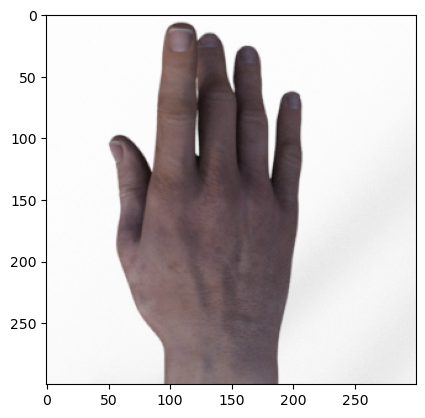

In [25]:
img_path=os.path.join('data/validation/paper1.png')
img=load_img(img_path,target_size=(150,150))
img1 = mpimg.imread(img_path)
plt.imshow(img1)

x=img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
pred=model.predict(x)
print(pred)